# EDA Layer - TCS Stock Prediction

This notebook performs exploratory data analysis (EDA) on processed features (e.g., tcs_1y_features.csv).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

plt.style.use('seaborn-v0_8-darkgrid')
sns.set()

## Load Data

In [2]:
df = pd.read_csv('data/processed/tcs_1y_features.csv')
df.index = pd.date_range(start='2022-01-01', periods=len(df), freq='B')  # Simulated datetime index
df.index.name = 'Date'
df.head()

,Open,High,Low,Close,Volume,Date,Price,MA20,MA50,RSI,...,Lag_4,Lag_5,Lag_6,Lag_7,Return_1d,Return_5d,Volatility_5d,Price_Change,Volume_Change,Tomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,3290.935502,3310.775865,3276.079332,3279.273193,1066803.0,2023-07-26,3293.427598,3230.405493,3167.784370,57.994136,...,3351.859863,3349.682373,3375.552490,3370.581299,-0.003192,-0.021020,34.689547,-11.662309,-0.161964,3287.596436
2022-01-04,3285.709229,3301.871819,3276.127880,3287.596436,1701769.0,2023-07-27,3288.999849,3240.463220,3171.098018,58.482093,...,3259.916992,3351.859863,3349.682373,3375.552490,0.002538,-0.019172,12.110439,1.887207,0.595205,3247.431641
2022-01-05,3276.079282,3284.499291,3223.816865,3247.431641,2599831.0,2023-07-28,3254.158078,3247.639111,3174.556011,53.330686,...,3285.515625,3259.916992,3351.859863,3349.682373,-0.012217,-0.003830,17.487236,-28.647642,0.527723,3311.356445
2022-01-06,3256.142121,3316.389075,3252.754742,3311.356445,2743678.0,2023-07-31,3284.571909,3253.821790,3179.462090,64.873997,...,3289.773926,3285.515625,3259.916992,3351.859863,0.019685,0.007865,23.184377,55.214324,0.055329,3340.971924
2022-01-07,3305.114051,3348.666066,3305.114051,3340.971924,1956167.0,2023-08-01,3326.890058,3262.930798,3184.519722,66.761085,...,3279.273193,3289.773926,3285.515625,3259.916992,0.008944,0.015563,35.113504,35.857873,-0.287027,3329.938721


## Correlation Matrix

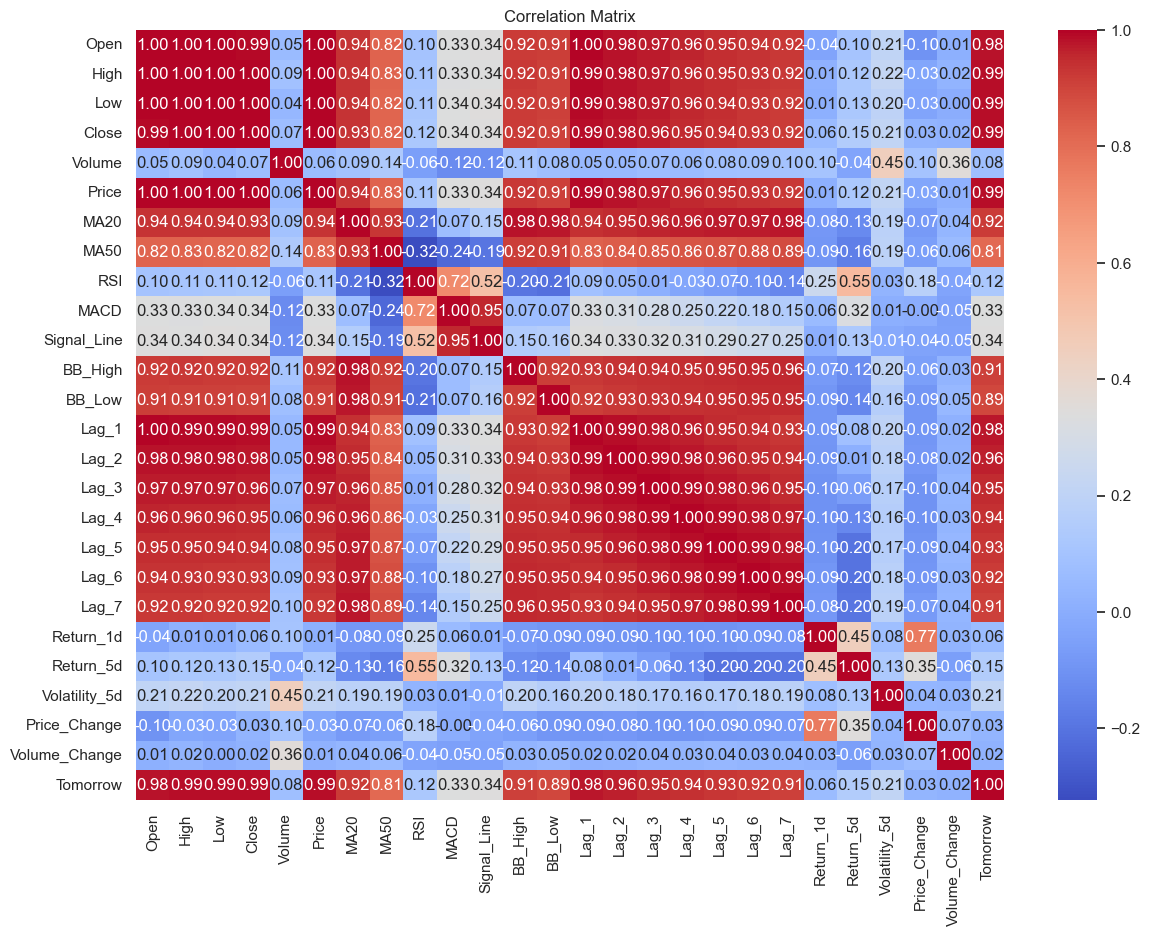

In [3]:
corr_df = df.drop(columns=['Date'])

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## MA20 & MA50

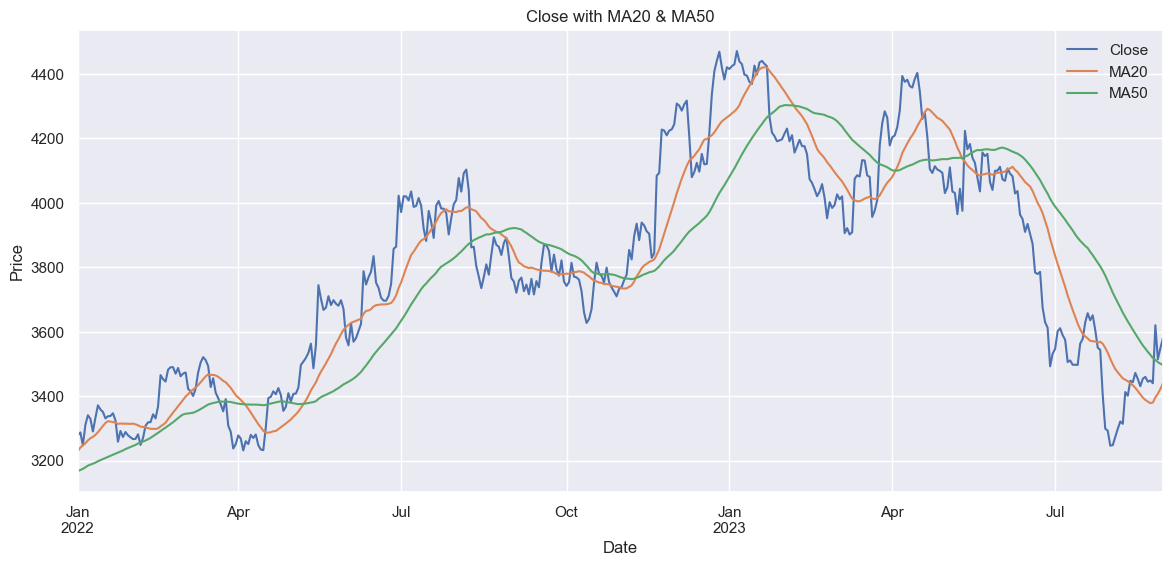

In [4]:
df[['Close', 'MA20', 'MA50']].plot(figsize=(14, 6), title='Close with MA20 & MA50')
plt.ylabel("Price")
plt.show()

## RSI and MACD

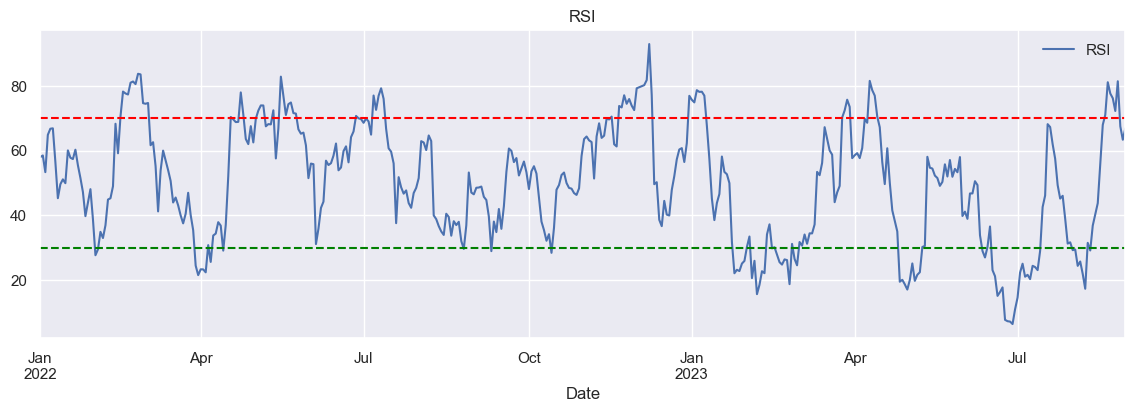

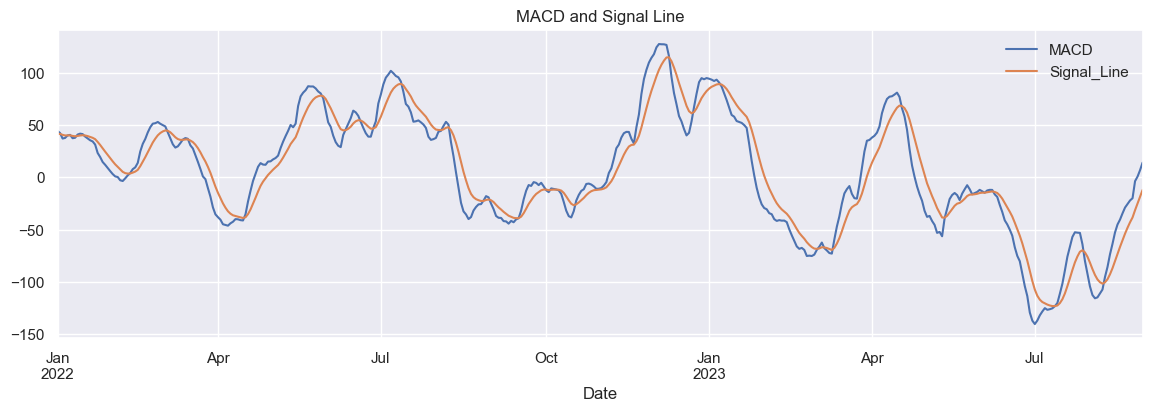

In [5]:
df[['RSI']].plot(figsize=(14, 4), title='RSI')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.show()

df[['MACD', 'Signal_Line']].plot(figsize=(14, 4), title='MACD and Signal Line')
plt.show()

## Bollinger Bands

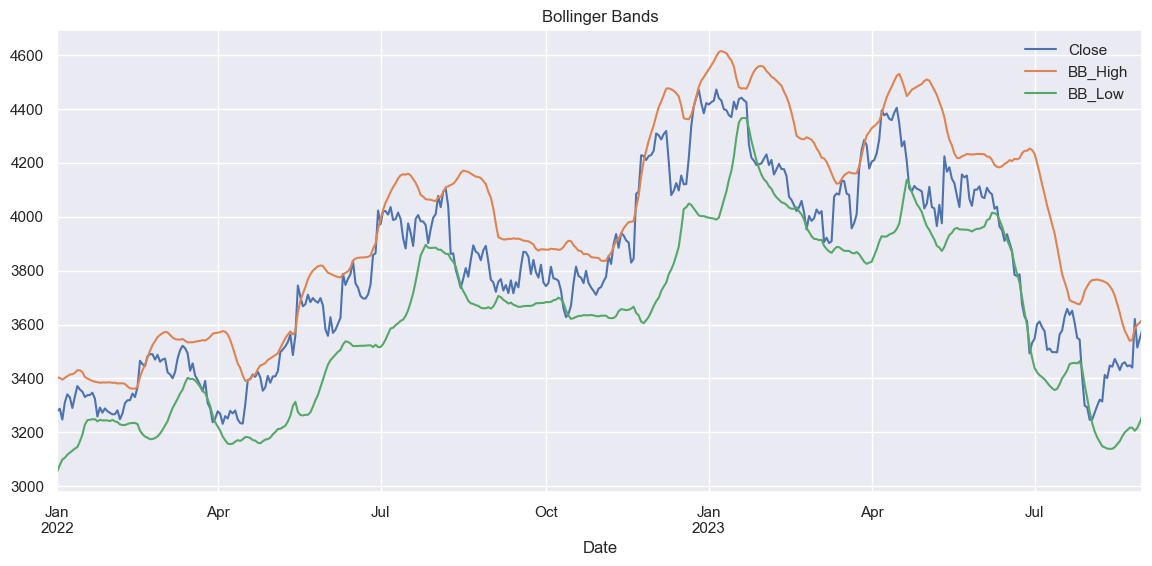

In [6]:
df[['Close', 'BB_High', 'BB_Low']].plot(figsize=(14, 6), title='Bollinger Bands')
plt.show()

## Rolling Volatility

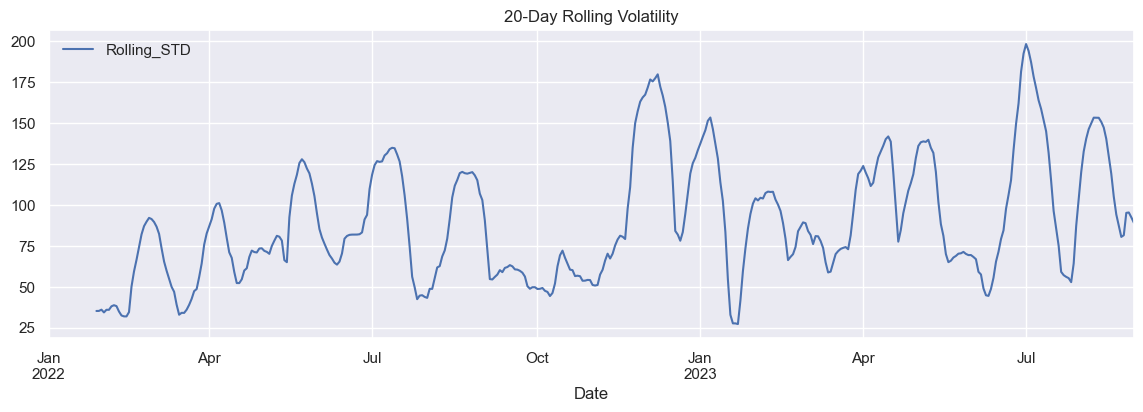

In [7]:
df['Rolling_STD'] = df['Close'].rolling(window=20).std()
df[['Rolling_STD']].plot(figsize=(14, 4), title='20-Day Rolling Volatility')
plt.show()

## Monthly Seasonality

C:\Users\oikan\AppData\Local\Temp\ipykernel_16304\1023449337.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df['Close'].resample('M').mean()


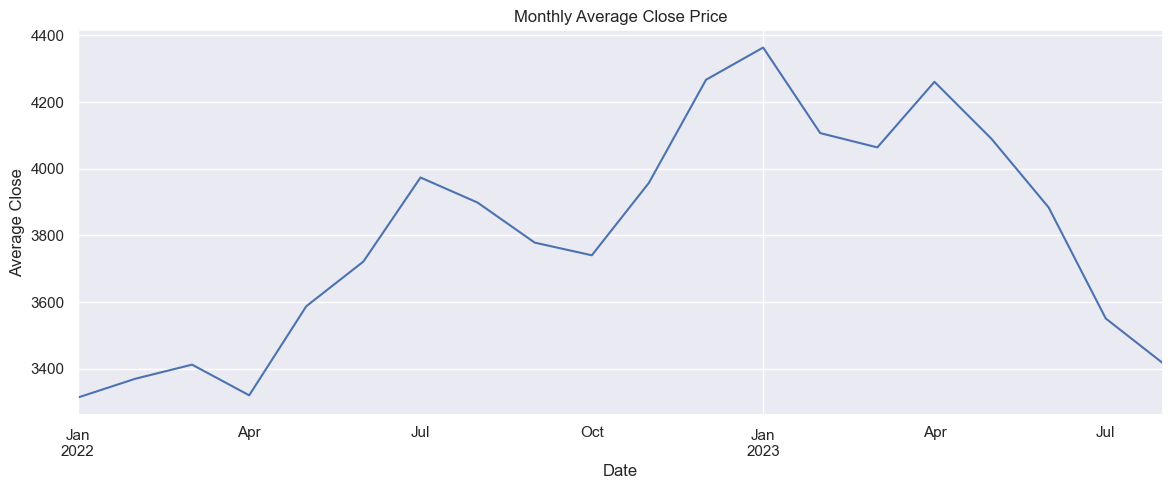

In [8]:
monthly_avg = df['Close'].resample('M').mean()
monthly_avg.plot(figsize=(14, 5), title='Monthly Average Close Price')
plt.ylabel("Average Close")
plt.show()

## ACF and PACF

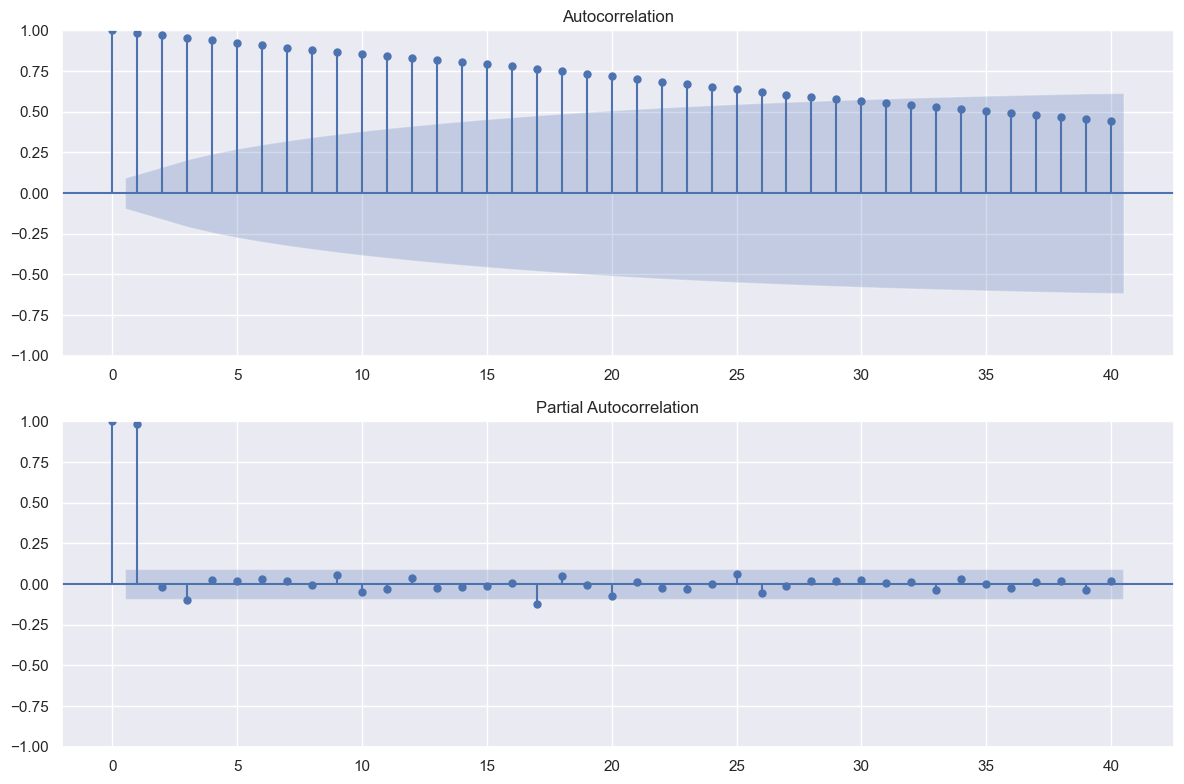

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(df['Close'], lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(df['Close'], lags=40, ax=ax[1])
plt.tight_layout()
plt.show()

## Volume Trend & Rolling Mean

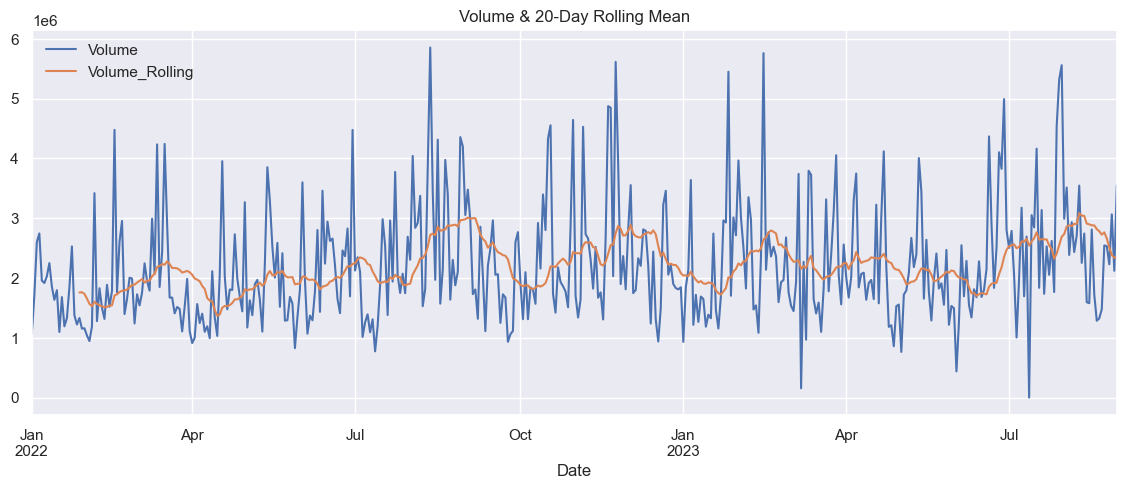

In [10]:
df['Volume_Rolling'] = df['Volume'].rolling(window=20).mean()
df[['Volume', 'Volume_Rolling']].plot(figsize=(14, 5), title='Volume & 20-Day Rolling Mean')
plt.show()

## Daily Return Analysis

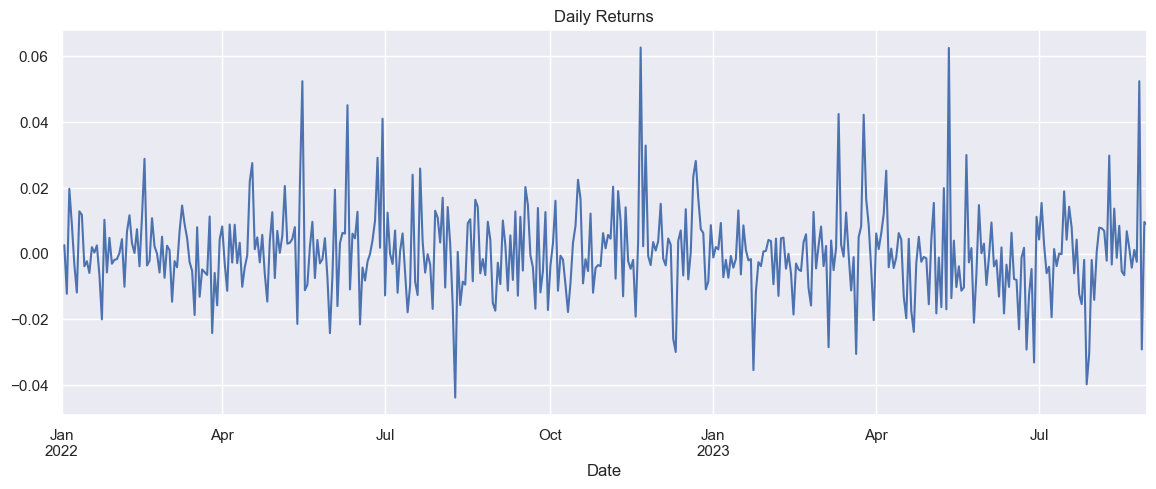

In [11]:
df['Daily_Return'] = df['Close'].pct_change()
df['Daily_Return'].plot(figsize=(14, 5), title='Daily Returns')
plt.show()

## Return Distribution

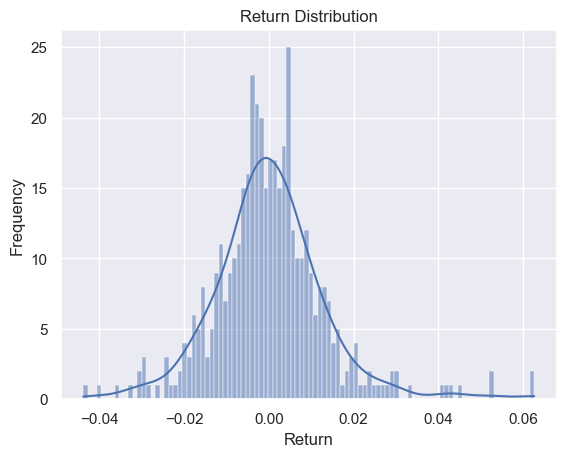

In [12]:
sns.histplot(df['Daily_Return'].dropna(), bins=100, kde=True)
plt.title('Return Distribution')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.show()

## Close vs Volume Scatter

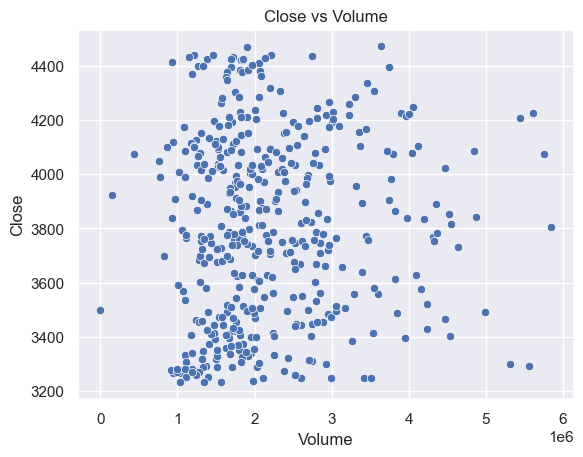

In [13]:
sns.scatterplot(data=df, x='Volume', y='Close')
plt.title('Close vs Volume')
plt.show()

## Cumulative Returns

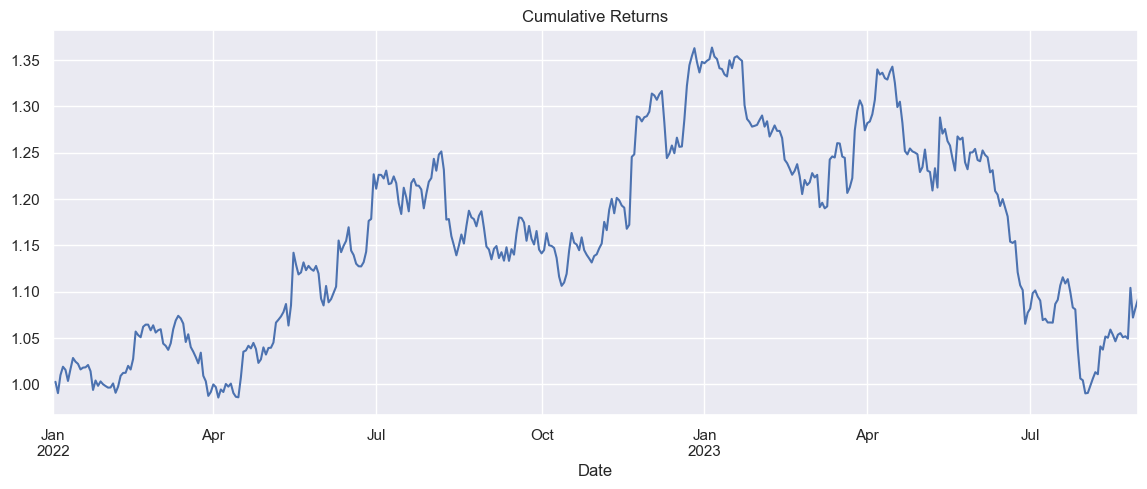

In [14]:
df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()
df['Cumulative_Return'].plot(figsize=(14, 5), title='Cumulative Returns')
plt.show()

## RSI Zones Count

In [15]:
overbought = (df['RSI'] > 70).sum()
oversold = (df['RSI'] < 30).sum()
print(f"Overbought days: {overbought}, Oversold days: {oversold}")

Overbought days: 68, Oversold days: 70


## MACD Crossover Signal Count

In [16]:
df['MACD_Cross'] = df['MACD'] > df['Signal_Line']
crossovers = df['MACD_Cross'].astype(int).diff().fillna(0).abs().sum()
print(f"MACD crossover signals: {int(crossovers)}")

MACD crossover signals: 38
